In [1]:
import os
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import trompy as tp

In [233]:
animal="VGP310"
day="031"
date="20221110"


s2p_folder = "C:\\Users\\mko102\\UiT Office 365\\O365-Pipette 2 - Dokumenter\\People\\Mette\\GitHub\\2P\\Processed\\VGP_procd_data_22-12-05\\sub-{}\\ses-{}".format(animal, day)
events_file = "C:\\Users\\mko102\\UiT Office 365\\O365-Pipette 2 - Dokumenter\\People\\Mette\\GitHub\\2P\\Processed\\behav\\sub-{0}\\ses-{1}-{2}\\sub-{0}_ses-{1}_events.csv".format(animal, day, date)


raw_F = np.load(os.path.join(s2p_folder, 'F.npy'))
neu_F = np.load(os.path.join(s2p_folder, 'Fneu.npy'))
iscell = np.load(os.path.join(s2p_folder, 'iscell.npy'))
stats=np.load(os.path.join(s2p_folder, 'stat.npy'), allow_pickle=True)


print(events_file)

C:\Users\mko102\UiT Office 365\O365-Pipette 2 - Dokumenter\People\Mette\GitHub\2P\Processed\behav\sub-VGP310\ses-031-20221110\sub-VGP310_ses-031_events.csv


In [234]:
stats[24]['med']

[147, 363]

In [235]:
neu_F.shape

(89, 11383)

In [236]:
cell_idx = 10

r = raw_F[cell_idx, :]
x = raw_F[cell_idx, :] - neu_F[cell_idx, :]
x7 = raw_F[cell_idx, :] - 0.7 * neu_F[cell_idx, :]
print('len X:',len(x))

#zscore

z = (r - np.mean(r))/np.std(r)

#df/f
df = r-np.mean(r)

#filter
t = np.arange(0,len(x)/10,0.1)
filt = signal.butter(4, 1, 'low', fs=10, output='sos')
filtered = signal.sosfilt(filt, z)

len X: 11383


(500.0, 700.0)

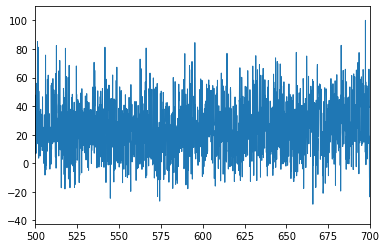

In [237]:
f, ax = plt.subplots()
ax.plot(t, x, linewidth=1)
# ax.plot(t, filtered, linewidth=1)
#ax.set_ylim(16800, 17000)

ax.set_xlim([500, 700])

In [238]:
np.shape(raw_F)

(89, 11383)

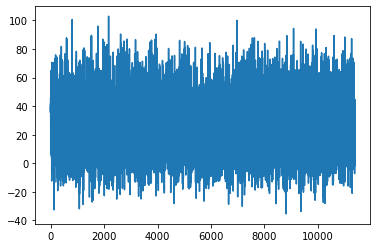

In [239]:
n = neu_F[cell_idx, :]
plt.plot(x)

In [240]:
import pandas as pd

df = pd.read_csv(events_file)

pump_frames = list(df[df['Item1'] == 'pump_on']['Item2.Item2'])

pump_frames=[frame for frame in pump_frames if frame < len(z)-100] #removes event if too close to the end

licks_frames = list (df[df['Item1']== 'Lick']['Item2.Item2'])


In [241]:
df

,Item1,Item2.Item1.Item1,Item2.Item1.Item2.Value.IsInvalid,Item2.Item1.Item2.Value.ElementType,Item2.Item1.Item2.Value.Size.Width,Item2.Item1.Item2.Value.Size.Height,Item2.Item1.Item2.Value.Rows,Item2.Item1.Item2.Value.Cols,Item2.Item1.Item2.Value.Step,Item2.Item1.Item2.Value.Depth,Item2.Item1.Item2.Value.Channels,Item2.Item1.Item2.Value.ElementSize,Item2.Item1.Item2.Value.Data,Item2.Item1.Item2.Value.IsClosed,Item2.Item1.Item2.Timestamp,Item2.Item2
0,Lick,True,False,6,10,2,2,10,80,F64,1,8,596993792,False,2022-11-10T16:46:19.7330944+01:00,81
1,Lick,True,False,6,10,2,2,10,80,F64,1,8,596921200,False,2022-11-10T16:46:19.8386304+01:00,82
2,Lick,True,False,6,10,2,2,10,80,F64,1,8,594283408,False,2022-11-10T16:46:20.2399616+01:00,86
3,Lick,True,False,6,10,2,2,10,80,F64,1,8,552366800,False,2022-11-10T16:46:21.5383424+01:00,99
4,Lick,True,False,6,10,2,2,10,80,F64,1,8,594210832,False,2022-11-10T16:46:23.3415808+01:00,117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,Lick,True,False,6,10,2,2,10,80,F64,1,8,595791696,False,2022-11-10T17:05:03.4247040+01:00,11312
413,Lick,True,False,6,10,2,2,10,80,F64,1,8,594282512,False,2022-11-10T17:05:03.5247232+01:00,11313
414,Lick,True,False,6,10,2,2,10,80,F64,1,8,596871712,False,2022-11-10T17:05:03.8254336+01:00,11316
415,Lick,True,False,6,10,2,2,10,80,F64,1,8,594211728,False,2022-11-10T17:05:03.9396096+01:00,11317


In [242]:
snips = []
for p in pump_frames:
    snips.append(filtered[p-50:p+100]) 

In [243]:
# excluding missed trials 
# List of hit and missed trieals

hit=[]
miss=[]
licks=[]
for p in pump_frames: 
    temp=[]
    for lick in licks_frames: 
        if lick > p and lick < p + 100:
            temp.append(lick)
            
    if len(temp) > 0: 
        hit.append(p) # list of frame number of pump on in trials WITH liskc
    if len(temp) == 0: 
        miss.append(p) # list of frame number of pump on in trials WITHOUT liskc
        
    licks.append(temp) # to get list of licks in each trial 
        
temp_l=[]
for trial in licks: 
    if len(trial) > 0: 
        temp_l.append(trial[:1])     # Makes a list of lists (frame number of first lick in hit trials)
        
#List comprehension to convert list of lists to flat list 
first_lick=[trial for sublist in temp_l for trial in sublist]  



print('hit', hit)
print('miss', miss)
print('lick', first_lick)




hit [178, 448, 696, 1008, 1233, 1549, 2256, 2508, 2773, 3084, 3422, 3701, 4210, 4667, 4894, 5219, 5561, 5834, 6680, 7623, 8204, 8551, 9192, 11018, 11257]
miss [1887, 3962, 4435, 6111, 6397, 7020, 7313, 7869, 8906, 9475, 9829, 10124, 10381, 10666]
lick [192, 460, 775, 1022, 1249, 1551, 2271, 2548, 2783, 3099, 3439, 3716, 4240, 4696, 4905, 5220, 5600, 5835, 6691, 7642, 8211, 8563, 9208, 11026, 11310]


In [244]:
# # List of first lick in trial 

# licks=[]

# for p in pump_frames: 
#     temp=[]
#     for l in licks_frames: 
#         if l > p and l < p + 100: 
#             temp.append(l)
#     licks.append(temp)

# temp_l=[]
# for trial in licks: 
#     if len(trial) > 0: 
#         temp_l.append(trial[:1])
        
# #List comprehension to convert list of lists to flat list 
# first_lick=[trial for sublist in temp_l for trial in sublist]

        
        

# first_lick

In [245]:
#snips in hit and missed trials and first lick in trial 

snips_hit=[]
for p in hit: 
    snips_hit.append(filtered[p-50:p+100])
    
    
snips_miss=[]
for p in miss: 
    snips_miss.append(filtered[p-50:p+100])
    
snips_lick=[]
for p in first_lick:
    snips_lick.append(filtered[p-50:p+100])
    
    
print(len(snips_hit))
print(len(snips_miss))
print(len(snips_lick))

25
14
25


In [246]:



len(snips)

39

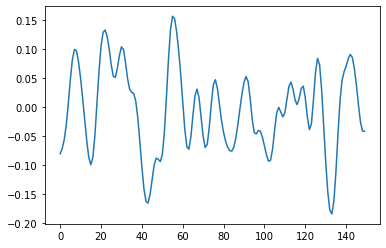

In [247]:
#all tirals

plt.plot(np.mean(snips, axis=0))


In [248]:
#fist lick

plt.plot(np.mean(snips_lick, axis=0))

C:\Users\mko102\Anaconda3\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


ValueError: operands could not be broadcast together with shapes (150,) (123,) 

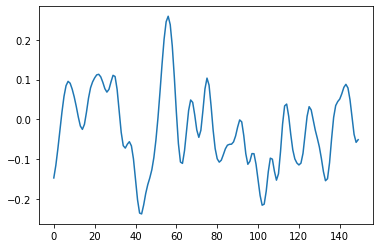

In [249]:
# hit trials

plt.plot(np.mean(snips_hit, axis=0))

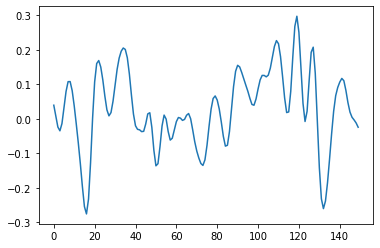

In [250]:
# missed trials
plt.plot(np.mean(snips_miss, axis=0))

In [251]:
# f,ax=plt.subplots (figsize=(9,6), ncols=2, nrows=2, sharey=False)
# f.subplots_adjust(wspace=0.2, hspace=0.5,bottom=0.15, left=0.3)

# tp.shadedError(snips,
#                ax=ax[0][0])

# tp.shadedError(snips_hit, 
#               ax=ax[0][1])

# tp.shadedError(snips_miss,
#               ax=ax[1][0])

# tp.shadedError(snips_lick,
#               ax=ax[1][1])

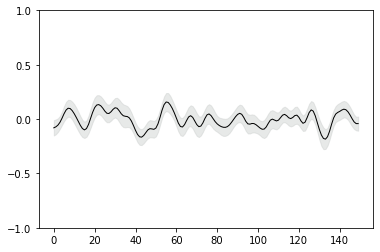

In [252]:
#all trials
f, ax = plt.subplots()
tp.shadedError(ax, snips)
ax.set_yticks([-1.0,-0.5, 0,  0.5, 1.0])
# f.savefig('PR_all_malt.pdf')

C:\Users\mko102\Anaconda3\lib\site-packages\trompy\fig_utils.py:69: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  yarray = np.array(yarray)


ValueError: operands could not be broadcast together with shapes (150,) (123,) 

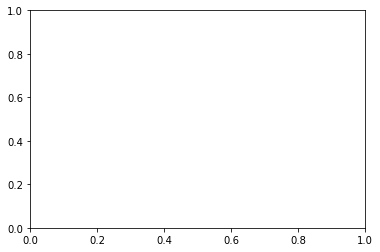

In [253]:
# licks trials
f, ax = plt.subplots()
tp.shadedError(ax, snips_lick)
ax.set_yticks([-1.0,-0.5, 0,  0.5, 1.0])
# f.savefig('PR_hit_malt.pdf')

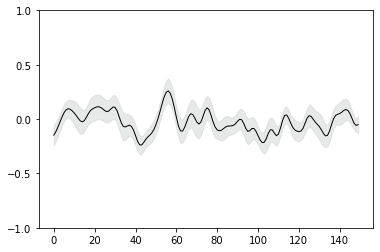

In [254]:
# hit trials
f, ax = plt.subplots()
tp.shadedError(ax, snips_hit)
ax.set_yticks([-1.0,-0.5, 0,  0.5, 1.0])
# f.savefig('PR_hit_malt.pdf')

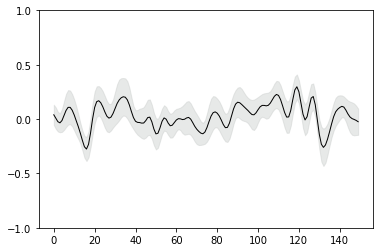

In [255]:
# miss trials
f, ax = plt.subplots()
tp.shadedError(ax, snips_miss)

ax.set_yticks([-1.0,-0.5, 0,  0.5, 1.0])

# f.savefig('PR_miss_malt.pdf')

In [256]:
# tp.makeheatmap?

In [257]:
cell_idx = [idx for idx,vals in enumerate(iscell) if vals[0]==1]

In [258]:
len(cell_idx)

52

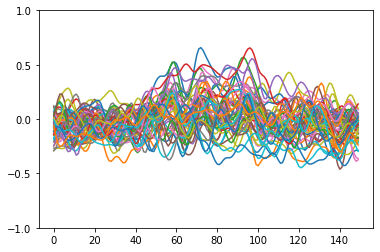

In [259]:
def filter_cell(x):

    t = np.arange(0,len(x)/10,0.1)
    filt = signal.butter(4, 1, 'low', fs=10, output='sos')
    filtered = signal.sosfilt(filt, x)
    
    return filtered
    

f, ax =plt.subplots()

avg_pump = np.zeros((len(cell_idx), 150))
avg_hit = np.zeros((len(cell_idx), 150))
avg_miss = np.zeros((len(cell_idx), 150))

for i, cell in enumerate(cell_idx):
    x = raw_F[cell, :] - 0.7*(neu_F[cell, :])
    x = raw_F[cell, :]
    x = (x - np.mean(x))/np.std(x)
    x = filter_cell(x)
    
    snips = []
    for p in pump_frames:
        snips.append(x[p-50:p+100])
    
    
    hit=[]
    miss=[]
    for p in pump_frames: 
        temp=[]
        for lick in licks_frames: 
            if lick > p and lick < p + 100:
                temp.append(lick)
        if len(temp) > 0: 
            hit.append(p)
        if len(temp) == 0: 
            miss.append(p)
            
    snips_hit=[]
    for p in hit: 
        snips_hit.append(x[p-50:p+100])
    
    
    avg = np.mean(snips, axis=0)
    
    avg_h = np.mean(snips_hit, axis=0)
    
    ax.plot(avg_h)
    ax.set_yticks([-1.0,-0.5, 0,  0.5, 1.0])
    avg_pump[i,:] = avg
    avg_hit[i,:] =avg_h


C:\Users\mko102\Anaconda3\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


ValueError: operands could not be broadcast together with shapes (150,) (123,) 

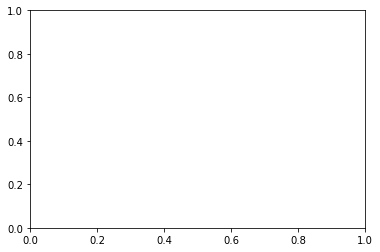

In [260]:
#Licks trial 

def filter_cell(x):

    t = np.arange(0,len(x)/10,0.1)
    filt = signal.butter(4, 1, 'low', fs=10, output='sos')
    filtered = signal.sosfilt(filt, x)
    
    return filtered
    

f, ax =plt.subplots()

avg_pump = np.zeros((len(cell_idx), 150))
avg_hit = np.zeros((len(cell_idx), 150))
avg_miss = np.zeros((len(cell_idx), 150))
avg_lick = np.zeros((len(cell_idx), 150))
for i, cell in enumerate(cell_idx):
    x = raw_F[cell, :] - 0.7*(neu_F[cell, :])
    x = raw_F[cell, :]
    x = (x - np.mean(x))/np.std(x)
    x = filter_cell(x)
    
    snips = []
    for p in pump_frames:
        snips.append(x[p-50:p+100])
    
    
    hit=[]
    miss=[]
    for p in pump_frames: 
        temp=[]
        for lick in licks_frames: 
            if lick > p and lick < p + 100:
                temp.append(lick)
        if len(temp) > 0: 
            hit.append(p) # list of frame number of pump on in trials WITH liskc
        if len(temp) == 0: 
            miss.append(p)
        
        licks.append(temp) # to get list of licks in each trial 
        
        
    temp_l=[]
    for trial in licks: 
        if len(trial) > 0: 
            temp_l.append(trial[:1])     # Makes a list of lists (frame number of first lick in hit trials)
        
    #List comprehension to convert list of lists to flat list 
    first_lick=[trial for sublist in temp_l for trial in sublist]  
            
    snips_hit=[]
    for p in hit: 
        snips_hit.append(x[p-50:p+100])
        
    snips_lick=[]
    for p in first_lick:
        snips_lick.append(x[p-50:p+100])
    
    avg = np.mean(snips, axis=0)
    
    avg_h = np.mean(snips_hit, axis=0)
    
    avg_l = np.mean (snips_lick, axis=0)
    
    ax.plot(avg_l)
    ax.set_yticks([-1.5,-1.0,-0.5, 0,  0.5, 1.0,1.5])
    avg_pump[i,:] = avg
    avg_hit[i,:] =avg_h
    avg_lick[i,:] =avg_l


In [261]:
maxsignal=[np.max(signal[50:100]) for signal in avg_hit]

In [262]:
def make_heatmap(data, events=None, ax=None, cmap="jet", sort=True, ylabel="Trials"):

    if ax == None:
        f, ax = plt.subplots()

    (ntrials, bins) = np.shape(data)
    
    print(ntrials, bins)
    

    xvals = np.linspace(-5,10,bins)
    yvals = np.arange(0, ntrials)
    xx, yy = np.meshgrid(xvals, yvals)

    if sort == True:
        try:
            inds = np.argsort(events)
            data = [data[i] for i in inds]
            events = [events[i] for i in inds]
        except:
            print("Events cannot be sorted")

    mesh = ax.pcolormesh(xx, yy, data, cmap=cmap, shading="auto")

#     if events:
#         ax.vlines(events, yvals-0.5, yvals+0.5, color='w')

#     ax.set_ylabel(ylabel, rotation=90, labelpad=2)

#     ax.invert_yaxis()
#     ax.set_yticks([])
#     ax.set_xticks([])
#     ax.spines['bottom'].set_visible(False)
#     ax.spines['left'].set_visible(False)

    return ax, mesh

52 150


(<AxesSubplot:>, <matplotlib.collections.QuadMesh at 0x1a05131c040>)

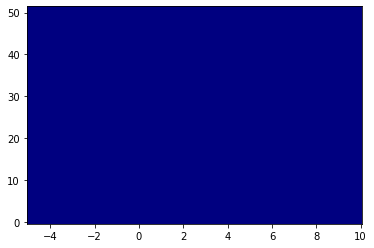

In [263]:
f, ax = plt.subplots()
make_heatmap(avg_lick,events=maxsignal, ax=ax)

In [264]:
np.shape(avg_hit)

(52, 150)

In [34]:
dir(tp)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'ax2prop',
 'barscatter',
 'bonferroni_corrected_ttest',
 'burstlengthFig',
 'burstprobFig',
 'calculate_burst_prob',
 'checknsessions',
 'discrete2continuous',
 'download_data',
 'event2sample',
 'fig_utils',
 'find_overlap',
 'findnoise',
 'findpercentilevalue',
 'fit_weibull',
 'flatten_list',
 'general_utils',
 'get_violinstats',
 'getuserhome',
 'ibiFig',
 'iliFig',
 'invisible_axes',
 'isnumeric',
 'lickCalc',
 'lick_figs',
 'lick_utils',
 'licklengthFig',
 'lighten_color',
 'logical_subset',
 'makeheatmap',
 'makerandomevents',
 'mastersnipper',
 'mean_and_sem',
 'med_abs_dev',
 'medfilereader',
 'medfilereader_licks',
 'merge_fed_files',
 'merge_files',
 'metafile_utils',
 'metafilemaker',
 'metafilereader',
 'nanroc',
 'parse_args',
 'plot_ROC_and_line',
 'processdata',
 'random_array',
 'remcheck',
 'removenoise',
 'removeshortbursts',
 'resample_sni